In [269]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

In [808]:
# all parameters for generating the time series should be configured in this cell
time = 20
nchannels = 2
dims = 1
effects = {
    "Pulse": {
        "channel":[0,1, 0, 2],
        "index":[50, 10, 15, 70],
        "scale":[3, -5, 2, 1.5]
        },
    "Trend": {
        "channel":[2, 1],
        "index":[20, 50],
        "slope":[15, -10]
        }
    }
mu = [15, 20, 50]
cov = np.diag([1, 0.5, 3])

In [809]:
class Gen():
    def __init__(self, time, nchannels= 2, dims = 1, effects = effects, mu = mu, cov = cov):              
        # get the parameters
        self.n = nchannels
        self.dims = dims
        self.effects = effects
        self.mu = mu
        self.cov = cov
        
        # generate the time axis
        self.t = np.arange(time, step = 0.2)        
        l = self.t.shape[0]
        
        # generate the different timeseries: multivariate normal dist
        self.x = np.random.multivariate_normal(self.mu, self.cov, l)

        # add effects (noise)
        self.add_effects(self.effects)            
    
    #plots the generated data
    def show(self):        
        plt.plot(self.x)
        plt.plot(self.trend.T * [1,-1], label="trend")
#         plt.plot(self.y.T, label="y")
#         plt.legend()
        plt.grid(True)
        
    #returns the Time series and their parameters
    def parameters(self):        
        params = {
            "T": self.t,
            "nchannels":self.n,
            "effects":self.effects,
            "mu":self.mu,
            "cov":self.cov
        }
        return self.x, params
    
    # loops through all the input effects and calls the respective function for each effect
    def add_effects(self, effects):        
        if self.effects is not None:
            for effect, params in self.effects.items(): 
                if effect == "Pulse":
                    self.add_pulse(params)
                
                if effect == "Trend":
                    self.add_trend(params)
    
    # adds a pulse effect
    def add_pulse(self, params):
        # extract the parameters:
            # channel: On which channel will the effect be applied.
            # index: At which index will the effect be applied.
            # scale: How strong is the Pulse. 
        channel = params["channel"]
        idx = params["index"]
        scale = params["scale"]
        
        # generate the pulse
        ground_val = self.x[idx, channel]
        k = np.random.uniform(ground_val, ground_val*scale)

        # add it to the channel
        self.x[idx, channel] += k
        
    def ReLu(self, x):
        return(np.maximum(0, x))
    
    def linear(self, x, a, b):
        return (x.T*a - b).T
    
    def add_trend(self, params):
        # extract the parameters:
            # channel: On which channel will the effect be applied.
            # index: At which index will the effect be applied.
            # slope: define the slope of the shift. 
        channel = params["channel"]
        idx = params["index"]
        slope = params["slope"]
        
        new_t = np.tile(self.t, (len(channel),1))
        print(new_t.shape)
        # generate the shift
        linear = self.linear(new_t, np.abs(slope), idx)
        print(linear.shape)
        self.trend = self.ReLu(linear)
        
        print(self.trend.shape)
        
#         self.trend *= np.sign(slope)
        # add it to the channel
        self.x[:,channel] += self.trend.T * np.sign(slope)

In [810]:
X = Gen(time)
x, params = X.parameters()

(2, 100)
(2, 100)
(2, 100)


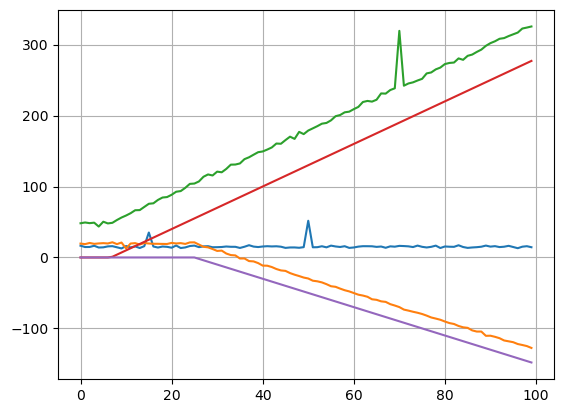

In [811]:
X.show()

In [182]:
x = np.random.multivariate_normal(np.array([0,5]).T, np.diag([1,1]), size=(10))
x.shape
# plt.plot(x)

(10, 2)

In [173]:
np.random.multivariate_normal(np.array([0,5,10]).T, np.diag([1,1,1]), size=(3, 10))

array([[[ 0.31935642,  5.4609029 ,  9.78421011],
        [ 0.98907246,  5.31475378, 12.46765106],
        [-1.50832149,  5.62060066,  8.95486746],
        [-0.79800882,  6.98508459, 11.74481415],
        [-1.85618548,  4.7772263 ,  9.93415215],
        [-2.13171211,  4.95116949, 10.39334122],
        [ 0.21726515,  3.00560623, 11.10770823],
        [ 0.24454398,  4.93808797,  9.24610704],
        [ 0.71195902,  5.91826915,  9.51790686],
        [ 0.08958761,  5.82699862,  8.04548788]],

       [[ 0.11747566,  3.09254311,  9.07709074],
        [ 0.46975143,  4.85563324,  9.59986165],
        [-0.29598385,  5.84820861, 10.70683045],
        [-0.78726893,  5.29294072,  9.52919275],
        [ 2.40432561,  4.26064326,  9.68717124],
        [-0.34888192,  4.56097376, 10.14110417],
        [ 0.27304932,  3.38142925,  9.42688664],
        [-1.32044755,  6.23620533, 12.46532508],
        [ 1.38323223,  5.34623312, 11.02251611],
        [ 0.16681027,  6.65671662, 10.66788961]],

       [[-0.2299

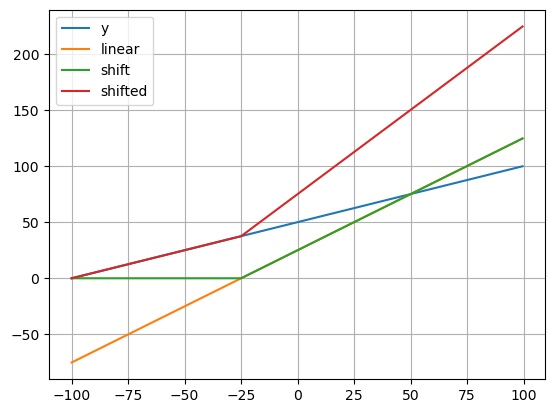

In [408]:
x = np.arange(-100, 100, 0.5)
y = np.arange(0, 100, 0.25)
def shift(x):
    return(np.maximum(0, x))
def linear(x, a, b):
    return a*x+b
linea = linear(x, 1, 25)
shift = shift(linea)
shifted = y+ shift
plt.plot(x, y, label="y")
plt.plot(x, linea, label="linear")
plt.plot(x, shift, label="shift")
plt.plot(x, shifted, label="shifted")
plt.legend()
plt.grid(True)

In [606]:
a = np.arange(100)
# a = np.array(a,)

In [607]:
a.shape

(100,)

In [608]:
(a.T+5).shape

(100,)

In [764]:
a = [10 , 20, 30, 40, 50]
a = np.tile(a,(3,1))
b = [10, -100, 1000]

In [770]:
a

array([[10, 10, 10],
       [20, 20, 20],
       [30, 30, 30],
       [40, 40, 40],
       [50, 50, 50]])

In [771]:
d = np.sign(b)

In [772]:
c = (a.T*b+b).T
a= a.T
c

ValueError: operands could not be broadcast together with shapes (3,5) (3,) 

In [732]:
a[:,[2,1]]

array([[10, 10],
       [20, 20],
       [30, 30],
       [40, 40],
       [50, 50]])

In [734]:
a[:,[2,1]] += c.T

In [735]:
a

array([[   10, 11010,  1110],
       [   20, 21020,  2120],
       [   30, 31030,  3130],
       [   40, 41040,  4140],
       [   50, 51050,  5150]])

In [768]:
c *d

ValueError: operands could not be broadcast together with shapes (2,5) (3,) 